In [1]:
# Kevin Hagler
# Student ID: 801197095
# Homework 3: Naïve Bayesian
# Date: 10/25/2022

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# gathering cancer data
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer() 
breast_data = breast.data 
breast_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
breast_input = pd.DataFrame(breast_data)

In [5]:
breast_labels = breast.target 

In [6]:
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data) 

features = breast.feature_names 
breast_dataset.columns = np.append(features,'label') 
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [7]:
# Setting the label column to ones and zeros.
varList = ['label']
def binaryMap(x):
    return x.map({'Malignant': 1, 'Benign': 0})

breast_dataset[varList] = breast_dataset[varList].apply(binaryMap)
data = breast_dataset
breast_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
#getting x and y values
x = breast_dataset.iloc[:,0:29].values
y = breast_dataset.iloc[:, [30]]
#print(y)

# Spliting data into 80% training and 20% testing
np.random.seed(0)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = 0.80, test_size = 0.2, random_state = 0)

In [9]:
# standardizing data set 
sc_X = StandardScaler() 
xTrain = sc_X.fit_transform(xTrain) 
xTest = sc_X.transform(xTest) 

In [10]:
#############
# Problem 1
#############

In [11]:
# Naive bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(breast.data, breast.target)
print(model)
expected = breast.target
predicted = model.predict(breast.data)
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))
matrix = confusion_matrix(expected, predicted)

GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[189  23]
 [ 10 347]]


Text(0.5, 6.799999999999997, 'Predicted')

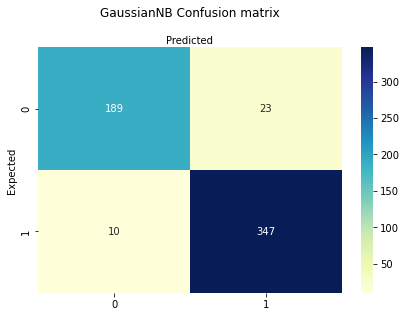

In [12]:
# Plotting the confusion matrix: prediction vs values
fig, ax = plt.subplots()
plt.tight_layout() 
# create heatmap 
sns.heatmap(pd.DataFrame(matrix),annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top") 
plt.title('GaussianNB Confusion matrix', y=1.1) 
plt.ylabel('Expected') 
plt.xlabel('Predicted') 

In [13]:
#############
# Problem 2
#############

In [14]:
from sklearn.decomposition import PCA
for i in range (12):
    n=i+1
    pca = PCA(n)
    breast3 = breast_dataset
    breast3 = pca.fit_transform(breast3)
    xTrain, xTest, yTrain, yTest = train_test_split(breast3, breast_labels, train_size = 0.80, test_size = 0.2, random_state = 0)
    Classifier = LogisticRegression()
    Classifier.fit(xTrain, yTrain)
    prediction =  Classifier.predict(xTest)
    matrix = confusion_matrix(yTest, prediction)
    print("K:",n)
    print('Accuracy =', metrics.accuracy_score(yTest,prediction))
    print('Recall =', metrics.recall_score(yTest,prediction))
    print('precision =', metrics.precision_score(yTest,prediction))
    print('matrix :')
    print(matrix)
    print("")

K: 1
Accuracy = 0.9122807017543859
Recall = 0.9552238805970149
precision = 0.9014084507042254
matrix :
[[40  7]
 [ 3 64]]

K: 2
Accuracy = 0.9473684210526315
Recall = 0.9701492537313433
precision = 0.9420289855072463
matrix :
[[43  4]
 [ 2 65]]

K: 3
Accuracy = 0.9385964912280702
Recall = 0.9552238805970149
precision = 0.9411764705882353
matrix :
[[43  4]
 [ 3 64]]

K: 4
Accuracy = 0.9385964912280702
Recall = 0.9253731343283582
precision = 0.96875
matrix :
[[45  2]
 [ 5 62]]

K: 5
Accuracy = 0.9385964912280702
Recall = 0.9253731343283582
precision = 0.96875
matrix :
[[45  2]
 [ 5 62]]

K: 6
Accuracy = 0.9473684210526315
Recall = 0.9253731343283582
precision = 0.9841269841269841
matrix :
[[46  1]
 [ 5 62]]

K: 7
Accuracy = 0.9473684210526315
Recall = 0.9253731343283582
precision = 0.9841269841269841
matrix :
[[46  1]
 [ 5 62]]

K: 8
Accuracy = 0.9473684210526315
Recall = 0.9253731343283582
precision = 0.9841269841269841
matrix :
[[46  1]
 [ 5 62]]

K: 9
Accuracy = 0.9473684210526315
Rec

In [15]:
#############
# Problem 3
#############

In [16]:
from sklearn.decomposition import PCA
for i in range (12):
    n=i+1
    pca = PCA(n)
    breast2 = breast_dataset
    breast2 = pca.fit_transform(breast2)
    xTrain, xTest, yTrain, yTest = train_test_split(breast2, breast_labels, train_size = 0.80, test_size = 0.2, random_state = 0)
    Classifier = LogisticRegression()
    Classifier.fit(xTrain, yTrain)
    prediction =  Classifier.predict(xTrain)
    model = GaussianNB()
    model.fit(xTrain,yTrain)
    print("K:",n)
    print('Accuracy =', metrics.accuracy_score(yTrain,prediction))
    print('Recall =', metrics.recall_score(yTrain,prediction))
    print('precision =', metrics.precision_score(yTrain,prediction))
    print("")
   

K: 1
Accuracy = 0.9032967032967033
Recall = 0.9620689655172414
precision = 0.8942307692307693

K: 2
Accuracy = 0.9274725274725275
Recall = 0.9655172413793104
precision = 0.9240924092409241

K: 3
Accuracy = 0.9296703296703297
Recall = 0.9620689655172414
precision = 0.93

K: 4
Accuracy = 0.9582417582417583
Recall = 0.9758620689655172
precision = 0.9593220338983051

K: 5
Accuracy = 0.9560439560439561
Recall = 0.9724137931034482
precision = 0.9591836734693877

K: 6
Accuracy = 0.9582417582417583
Recall = 0.9724137931034482
precision = 0.962457337883959

K: 7
Accuracy = 0.9560439560439561
Recall = 0.9689655172413794
precision = 0.9623287671232876

K: 8
Accuracy = 0.9560439560439561
Recall = 0.9689655172413794
precision = 0.9623287671232876

K: 9
Accuracy = 0.9582417582417583
Recall = 0.9689655172413794
precision = 0.9656357388316151

K: 10
Accuracy = 0.9956043956043956
Recall = 1.0
precision = 0.9931506849315068

K: 11
Accuracy = 0.9978021978021978
Recall = 1.0
precision = 0.9965635738831615